In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
import math
from pandas import DataFrame
from mpl_toolkits.mplot3d import Axes3D
import pyroc

In [3]:
%matplotlib notebook

In [4]:
plt.style.use('ggplot')

In [5]:
plt.rcParams['figure.figsize'] = (13,8)

In [6]:
df=pd.read_csv("./winequality-red.csv")

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df.loc[df.quality > 5, 'category'] = 1
df.loc[df.quality <= 5, 'category'] = 0

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.0


In [10]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,0.218072


In [11]:
#splitting the data set- train and test subsets
df_train=df.iloc[:500,]
df_test=df.iloc[500:,]

In [12]:
y, X = dmatrices('category ~ alcohol+sulphates+chlorides',df_train, return_type="dataframe")
y=np.ravel(y)
y2, X2= dmatrices('category ~ alcohol+sulphates+chlorides',df_test, return_type="dataframe")
y2=np.ravel(y2)
y3,X3=dmatrices('category ~ alcohol+sulphates+chlorides',df, return_type="dataframe")
y3=np.ravel(y)

In [13]:
#logisstic regression on training data
model = LogisticRegression()

In [14]:
model = model.fit(X, y)

In [15]:
model.score(X,y)

0.69199999999999995

In [16]:
#testing the model on the test data
model.score(X2,y2)

0.72702456778889901

In [17]:
p=DataFrame(list(zip(df['alcohol'],df['sulphates'],df['chlorides'],df['category'],df['category']*0,df['category']*0)),\
            columns=['alcohol','sulphates','chlorides','category','predicted','probability'])

In [18]:
p

,alcohol,sulphates,chlorides,category,predicted,probability
0,9.4,0.56,0.076,0.0,0.0,0.0
1,9.8,0.68,0.098,0.0,0.0,0.0
2,9.8,0.65,0.092,0.0,0.0,0.0
3,9.8,0.58,0.075,1.0,0.0,0.0
4,9.4,0.56,0.076,0.0,0.0,0.0
5,9.4,0.56,0.075,0.0,0.0,0.0
6,9.4,0.46,0.069,0.0,0.0,0.0
7,10.0,0.47,0.065,1.0,0.0,0.0
8,9.5,0.57,0.073,1.0,0.0,0.0
9,10.5,0.80,0.071,0.0,0.0,0.0


In [19]:
#coefficients for parameters in the logit
p_coeff=DataFrame()
p_coeff=pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

In [20]:
p_coeff

,0,1
0,Intercept,[-2.90397599352]
1,alcohol,[0.51792360382]
2,sulphates,[0.965549170452]
3,chlorides,[-1.24190902297]


In [21]:
beta0=float(p_coeff[1][0])
beta1=float(p_coeff[1][1])
beta2=float(p_coeff[1][2])
beta3=float(p_coeff[1][3])

In [22]:
for i in range(0,1599):
    x=1/(1+math.exp(-beta0-(beta1*p.iloc[i]['alcohol'])-(beta2*p.iloc[i]['sulphates'])-(beta3*p.iloc[i]['chlorides'])))
    p.set_value(i,'probability',x)

In [23]:
p

,alcohol,sulphates,chlorides,category,predicted,probability
0,9.4,0.56,0.076,0.0,0.0,0.917649
1,9.8,0.68,0.098,0.0,0.0,0.937412
2,9.8,0.65,0.092,0.0,0.0,0.936137
3,9.8,0.58,0.075,1.0,0.0,0.933302
4,9.4,0.56,0.076,0.0,0.0,0.917649
5,9.4,0.56,0.075,0.0,0.0,0.917743
6,9.4,0.46,0.069,0.0,0.0,0.910761
7,10.0,0.47,0.065,1.0,0.0,0.933909
8,9.5,0.57,0.073,1.0,0.0,0.922442
9,10.5,0.80,0.071,0.0,0.0,0.961524


In [24]:
p.plot.scatter(x='alcohol', y='sulphates', c='probability', s=90)
#plot.xlim(0,10)

<IPython.core.display.Javascript object>

In [25]:
p['sulphates'].min()

0.33000000000000002

In [26]:
p['predicted'] = model.predict(X3)
p

,alcohol,sulphates,chlorides,category,predicted,probability
0,9.4,0.56,0.076,0.0,0.0,0.917649
1,9.8,0.68,0.098,0.0,0.0,0.937412
2,9.8,0.65,0.092,0.0,0.0,0.936137
3,9.8,0.58,0.075,1.0,0.0,0.933302
4,9.4,0.56,0.076,0.0,0.0,0.917649
5,9.4,0.56,0.075,0.0,0.0,0.917743
6,9.4,0.46,0.069,0.0,0.0,0.910761
7,10.0,0.47,0.065,1.0,0.0,0.933909
8,9.5,0.57,0.073,1.0,0.0,0.922442
9,10.5,0.80,0.071,0.0,1.0,0.961524


In [27]:
#using a scatter plot to depict the predicted qualities
ax = p[p.predicted == 1].plot(x="alcohol", y="sulphates", kind="scatter", color="green", label="HIGH", \
                                             s=100, alpha=0.5)
p[p.predicted == 0].plot(x="alcohol", y="sulphates", kind="scatter", color="red", label="LOW", \
                                        s=100, alpha=0.5, ax=ax)
Z = model.predict(X3)
xx=X3['alcohol']
yy=X3['sulphates']
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, cmap=plt.cm.Paired)

<IPython.core.display.Javascript object>

TypeError: Input z must be a 2D array.

In [28]:
p_xy=DataFrame()

#for i in range(0,1599):
p_xy['logit']=(beta0+(beta1*p['alcohol'])+(beta2*p['sulphates'])+(beta3*p['chlorides']))
p_xy['predicted']=p['predicted']
p_xy['sulphates']=p['sulphates']
p_xy['alcohol']=p['alcohol']
p_xy['chlorides']=p['chlorides']
p_xy['probability']=p['probability']
p_xy

,logit,predicted,sulphates,alcohol,chlorides,probability
0,2.410828,0.0,0.56,9.4,0.076,0.917649
1,2.706542,0.0,0.68,9.8,0.098,0.937412
2,2.685027,0.0,0.65,9.8,0.092,0.936137
3,2.638551,0.0,0.58,9.8,0.075,0.933302
4,2.410828,0.0,0.56,9.4,0.076,0.917649
5,2.412070,0.0,0.56,9.4,0.075,0.917743
6,2.322967,0.0,0.46,9.4,0.069,0.910761
7,2.648344,0.0,0.47,10.0,0.065,0.933909
8,2.476002,0.0,0.57,9.5,0.073,0.922442
9,3.218486,1.0,0.80,10.5,0.071,0.961524


In [29]:
p_xy=p_xy.sort_values(by='logit')

In [30]:
p_xy

,logit,predicted,sulphates,alcohol,chlorides,probability
517,1.806496,0.0,0.63,8.400000,0.200,0.858938
1436,1.916099,0.0,0.65,8.500000,0.169,0.871703
170,2.055729,0.0,0.33,9.100000,0.058,0.886525
567,2.055995,0.0,0.60,9.000000,0.226,0.886552
566,2.055995,0.0,0.60,9.000000,0.226,0.886552
120,2.086640,0.0,0.57,9.000000,0.178,0.889598
1521,2.096582,0.0,0.43,9.050000,0.082,0.890571
746,2.111792,0.0,0.47,9.000000,0.080,0.892044
544,2.116223,0.0,0.79,8.400000,0.075,0.892470
1476,2.123322,0.0,0.75,8.800000,0.205,0.893149


In [31]:
p_xy.shape

(1599, 6)

In [32]:
#estimating threshold probability 
for i in range(0,1599):
    if p_xy.iloc[i]['predicted']==0 and p_xy.iloc[i+1]['predicted']==1:
        print(i)
        c=i
        print(p_xy.iloc[i]['logit'],p_xy.iloc[i+1]['logit'])

805
2.90358014314 2.90419353593


In [33]:
c
print(p_xy.iloc[c]['sulphates'],p_xy.iloc[c]['alcohol'])
#print (LogisticRegression().predict_proba(df[0,:]))

0.47 10.5


<IPython.core.display.Javascript object>


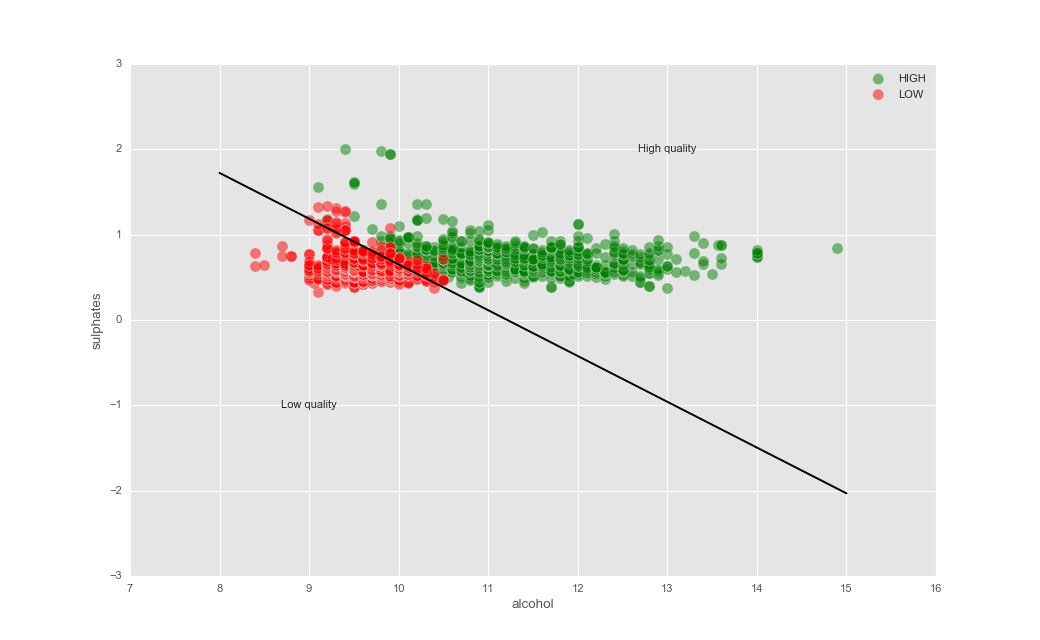

In [34]:
ax = p_xy[p_xy.predicted == 1].plot(x="alcohol", y="sulphates", kind="scatter", color="green", label="HIGH", \
                                             s=100, alpha=0.5)
p_xy[p_xy.predicted == 0].plot(x="alcohol", y="sulphates", kind="scatter", color="red", label="LOW", \
                                        s=100, alpha=0.5, ax=ax)

x1,x2,n = 8.,16.,11
m1=-beta1/beta2#-0.526285622473/0.809039658354
m3=-beta3/beta2
#sulphate=-(0.52*alcohol/0.809)+((logit+2.95)/0.809)
b=(p_xy.iloc[c]['logit']-beta0)/(beta2)
x = np.r_[x1:x2]
def f(x):
    return (m1*x + b)
#plotting the threshold logit value over the scatter plot
ax.plot(x,f(x),'k')
#attempt to draw arrows 
ax.annotate('Low quality', xy=(9, f(9)), xytext=(9, -1), ha='center', va='center')
ax.annotate('High quality', xy=(9, f(9)), xytext=(13, 2), ha='center', va='center')

<IPython.core.display.Javascript object>


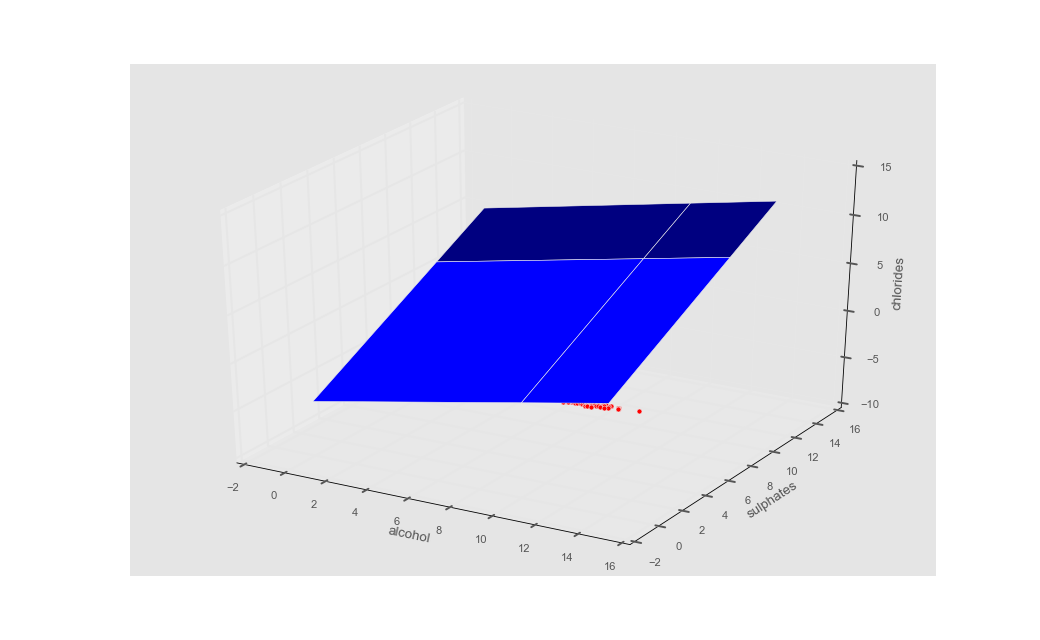

-5.80755613666


In [35]:
fig = plt.figure()#.gca(projection='3d')
ax2 = fig.add_subplot(111, projection='3d')
col=['g','r']
for i in range(0,1599):
    ax2.scatter(p_xy.iloc[i]['alcohol'], p_xy.iloc[i]['sulphates'], p_xy.iloc[i]['chlorides'], zdir='z', s=20, \
                c=col[int(p_xy.iloc[i]['predicted'])], depthshade=True)
#x=np.r_[8:16]
#y=np.r_[0:3]
#m1=1
#m2=1
#b=1
beta4=beta0-p_xy.iloc[805]['logit']
#beta4=beta4+5
print(beta4)
point=np.array([-beta4/beta1,0,0])
normal=np.array([beta1,beta2,beta3])
xx, yy = np.meshgrid(range(15), range(15))
z = (-normal[0]*(xx) - normal[1]*yy - beta4)*1./normal[2]

ax2.plot_surface(xx,yy,z, color='blue')

ax2.set_xlabel('alcohol')
ax2.set_ylabel('sulphates')
ax2.set_zlabel('chlorides')

In [36]:
#colors = ['r', 'g']
#for i in enumerate(p_xy):
 #   ax.scatter(p_xy.iloc[i]['alcohol'], p_xy.iloc[i]['sulphates'], p_xy.iloc[i]['chlorides'], c=colors[0], \
#            label='cluster {}'.format(i))

#ax.legend(bbox_to_anchor = (1.5, 1))

In [37]:
from sklearn.metrics import precision_recall_fscore_support
y_true = df['category']#np.array(['cat', 'dog', 'pig', 'cat', 'dog', 'pig'])
y_pred = p_xy['predicted']
precision_recall_fscore_support(y_true, y_pred, average='binary')
#precision,recall,fbeta_score

(0.60025220680958391, 0.5567251461988304, 0.57766990291262132, None)

In [38]:
p['alcohol'].max()

14.9

In [39]:
p['sulphates'].max()

2.0